In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## First we will deal Id and Cabin columns

In [4]:
data[['Group','SubGroup']] = data.PassengerId.str.split('_',expand=True)
data.drop('SubGroup', axis=1, inplace=True)

In [5]:
data[['Deck','Num','Side']] = data.Cabin.str.split('/', expand=True)
data = data[['Group','HomePlanet','CryoSleep','Deck','Side','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

In [6]:
# Here we will transform object to float numbers!
data['Deck'] = data['Deck'].replace(['A','B','C','D','E','F','G','T'],[1,2,3,4,5,6,7,8])
data['Side'] = data['Side'].replace(['P','S'],[0,1])
data['HomePlanet'] = data['HomePlanet'].replace(['Earth','Europa','Mars'],[1,2,3])
data['Destination'] = data['Destination'].replace(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e'],[1,2,3])
data['CryoSleep'] = data['CryoSleep'].replace([False,True],[0,1])
data['VIP'] = data['VIP'].replace([False,True],[0,1])

## Fill NaN values for Deck and Side

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

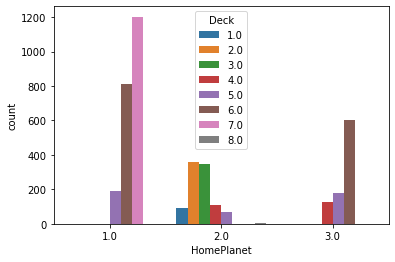

In [7]:
sns.countplot(x='HomePlanet',hue='Deck',data=data)

In [8]:
data.loc[data.HomePlanet == 3, 'Deck'] = data.fillna(6)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

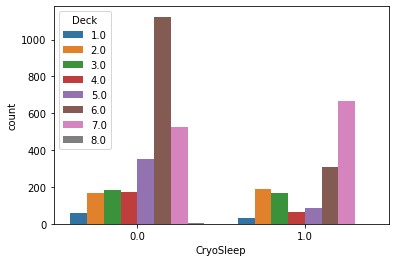

In [9]:
sns.countplot(x='CryoSleep',hue='Deck', data=data)

In [10]:
data.loc[data.CryoSleep == 1, 'Deck'] = data.fillna(7)
data.loc[data.CryoSleep == 0, 'Deck'] = data.fillna(6)

<AxesSubplot:xlabel='Destination', ylabel='count'>

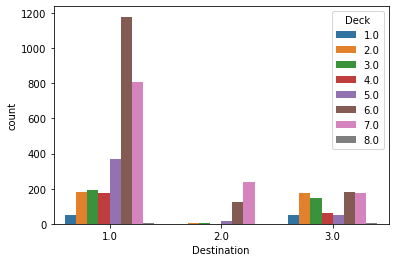

In [11]:
sns.countplot(x='Destination',hue='Deck',data=data)

In [12]:
data.loc[data.Destination == 2, 'Deck'] = data.fillna(7)

In [13]:
data['Deck'] = data['Deck'].fillna(6)

### Since there is no good correlation with 'Side' column, l will drop it

In [14]:
data.drop('Side',axis=1, inplace=True)

## Now I will clean the data 
### First I will fill the values for money columns

In [15]:
data.loc[data.HomePlanet == 1].mean()

Group                  inf
HomePlanet        1.000000
CryoSleep         0.310750
Deck              6.456474
Destination       1.424256
Age              25.746175
VIP               0.000000
RoomService     134.749435
FoodCourt       158.808269
ShoppingMall    132.097693
Spa             138.786360
VRDeck          139.193781
dtype: float64

In [16]:
data.loc[data.HomePlanet == 1, 'RoomService'] = data['RoomService'].fillna(135)
data.loc[data.HomePlanet == 1, 'FoodCourt'] = data['FoodCourt'].fillna(158)
data.loc[data.HomePlanet == 1, 'ShoppingMall'] = data['ShoppingMall'].fillna(132)
data.loc[data.HomePlanet == 1, 'Spa'] = data['Spa'].fillna(138)
data.loc[data.HomePlanet == 1, 'VRDeck'] = data['VRDeck'].fillna(139)

In [17]:
data.loc[data.HomePlanet == 2].mean()

Group                   inf
HomePlanet         2.000000
CryoSleep          0.472932
Deck               2.795409
Destination        1.873727
Age               34.158859
VIP                0.047374
RoomService      122.281218
FoodCourt       1422.730691
ShoppingMall     118.169231
Spa              856.762538
VRDeck           916.115619
dtype: float64

In [18]:
data.loc[data.HomePlanet == 2, 'RoomService'] = data['RoomService'].fillna(122)
data.loc[data.HomePlanet == 2, 'FoodCourt'] = data['FoodCourt'].fillna(1423)
data.loc[data.HomePlanet == 2, 'ShoppingMall'] = data['ShoppingMall'].fillna(118)
data.loc[data.HomePlanet == 2, 'Spa'] = data['Spa'].fillna(856)
data.loc[data.HomePlanet == 2, 'VRDeck'] = data['VRDeck'].fillna(916)

In [19]:
data.loc[data.HomePlanet == 3].mean()

Group                  inf
HomePlanet        3.000000
CryoSleep         0.402426
Deck              5.539459
Destination       1.244444
Age              29.762806
VIP               0.029768
RoomService     530.941886
FoodCourt        50.960044
ShoppingMall    341.547855
Spa             102.201327
VRDeck           53.179713
dtype: float64

In [20]:
data.loc[data.HomePlanet == 3, 'RoomService'] = data['RoomService'].fillna(531)
data.loc[data.HomePlanet == 3, 'FoodCourt'] = data['FoodCourt'].fillna(51)
data.loc[data.HomePlanet == 3, 'ShoppingMall'] = data['ShoppingMall'].fillna(342)
data.loc[data.HomePlanet == 3, 'Spa'] = data['Spa'].fillna(102)
data.loc[data.HomePlanet == 3, 'VRDeck'] = data['VRDeck'].fillna(53)

In [21]:
data.loc[data.Destination == 1].mean()

Group                  inf
HomePlanet        1.727586
CryoSleep         0.330567
Deck              5.514547
Destination       1.000000
Age              28.665171
VIP               0.016943
RoomService     242.297700
FoodCourt       369.471583
ShoppingMall    188.743399
Spa             257.351745
VRDeck          270.020988
dtype: float64

In [22]:
data.loc[data.Destination == 1, 'RoomService'] = data['RoomService'].fillna(242)
data.loc[data.Destination == 1, 'FoodCourt'] = data['FoodCourt'].fillna(369)
data.loc[data.Destination == 1, 'ShoppingMall'] = data['ShoppingMall'].fillna(189)
data.loc[data.Destination == 1, 'Spa'] = data['Spa'].fillna(257)
data.loc[data.Destination == 1, 'VRDeck'] = data['VRDeck'].fillna(270)

In [23]:
data.loc[data.Destination == 2].mean()

Group                  inf
HomePlanet        1.120735
CryoSleep         0.503937
Deck              6.494845
Destination       2.000000
Age              26.978836
VIP               0.010417
RoomService     111.012887
FoodCourt       171.798450
ShoppingMall    131.664948
Spa             119.971649
VRDeck          154.342784
dtype: float64

In [24]:
data.loc[data.Destination == 2, 'RoomService'] = data['RoomService'].fillna(111)
data.loc[data.Destination == 2, 'FoodCourt'] = data['FoodCourt'].fillna(171)
data.loc[data.Destination == 2, 'ShoppingMall'] = data['ShoppingMall'].fillna(131)
data.loc[data.Destination == 2, 'Spa'] = data['Spa'].fillna(120)
data.loc[data.Destination == 2, 'VRDeck'] = data['VRDeck'].fillna(154)

In [25]:
data.loc[data.Destination == 3].mean()

Group                  inf
HomePlanet        1.764347
CryoSleep         0.442822
Deck              4.357907
Destination       3.000000
Age              29.555825
VIP               0.024420
RoomService     190.149822
FoodCourt       814.836905
ShoppingMall    154.059524
Spa             557.780952
VRDeck          525.382878
dtype: float64

In [26]:
data.loc[data.Destination == 3, 'RoomService'] = data['RoomService'].fillna(190)
data.loc[data.Destination == 3, 'FoodCourt'] = data['FoodCourt'].fillna(814)
data.loc[data.Destination == 3, 'ShoppingMall'] = data['ShoppingMall'].fillna(154)
data.loc[data.Destination == 3, 'Spa'] = data['Spa'].fillna(558)
data.loc[data.Destination == 3, 'VRDeck'] = data['VRDeck'].fillna(525)

### Now I will do VIP column

In [27]:
data['VIP'] = data['VIP'].fillna(0) #Here I used 0 because it is much more non VIP peoples

### Now let do HomePlanet column

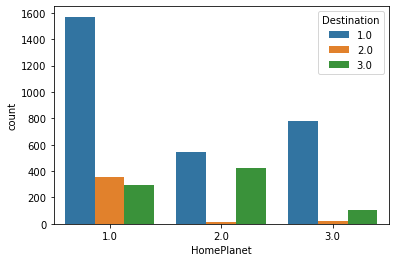

In [28]:
sns.countplot(x='HomePlanet',hue='Destination', data=data)
data.loc[data.Destination == 2, 'HomePlanet'] = data['HomePlanet'].fillna(1)

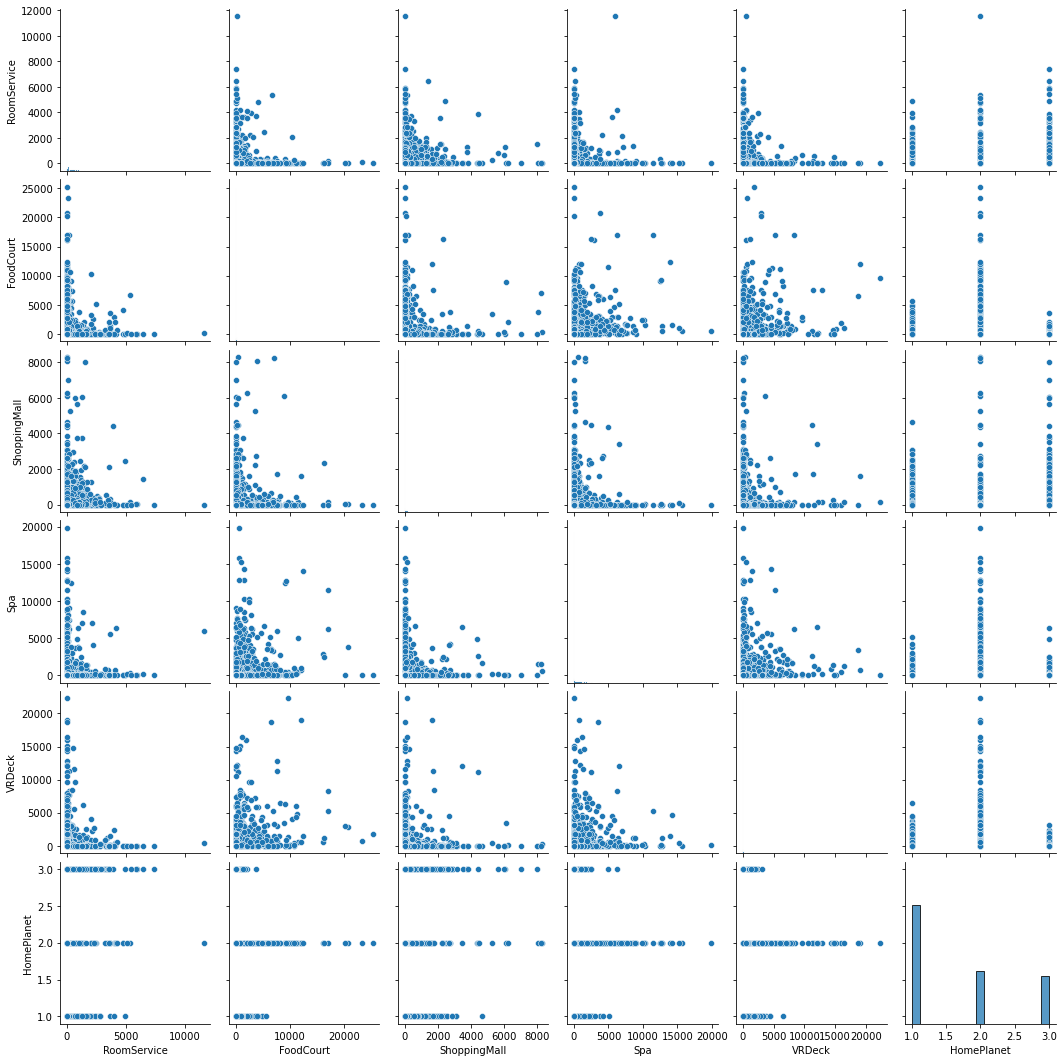

In [29]:
sns.pairplot(data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','HomePlanet']],palette='coolwarm')

In [30]:
data.loc[data.FoodCourt > 5800, 'HomePlanet'] = data['HomePlanet'].fillna(2)
data.loc[data.Spa > 6600, 'HomePlanet'] = data['HomePlanet'].fillna(2)
data.loc[data.VRDeck > 6400, 'HomePlanet'] = data['HomePlanet'].fillna(2)

<AxesSubplot:xlabel='Deck', ylabel='count'>

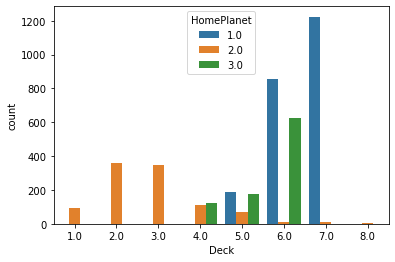

In [31]:
sns.countplot(x='Deck',hue='HomePlanet',data=data)

In [32]:
data.loc[data.Deck == 1, 'HomePlanet'] = data['HomePlanet'].fillna(2)
data.loc[data.Deck == 2, 'HomePlanet'] = data['HomePlanet'].fillna(2)
data.loc[data.Deck == 3, 'HomePlanet'] = data['HomePlanet'].fillna(2)
data.loc[data.Deck == 7, 'HomePlanet'] = data['HomePlanet'].fillna(1)
data.loc[data.Deck == 8, 'HomePlanet'] = data['HomePlanet'].fillna(2)

In [33]:
data['HomePlanet'] = data['HomePlanet'].fillna(1)

### Now let do Destination column

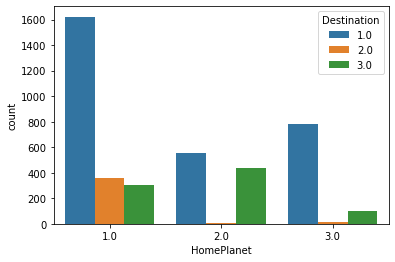

In [34]:
sns.countplot(x='HomePlanet',hue='Destination',data=data)
data.loc[data.HomePlanet == 3, 'Destination'] = data['Destination'].fillna(1)
data.loc[data.HomePlanet == 1, 'Destination'] = data['Destination'].fillna(1)

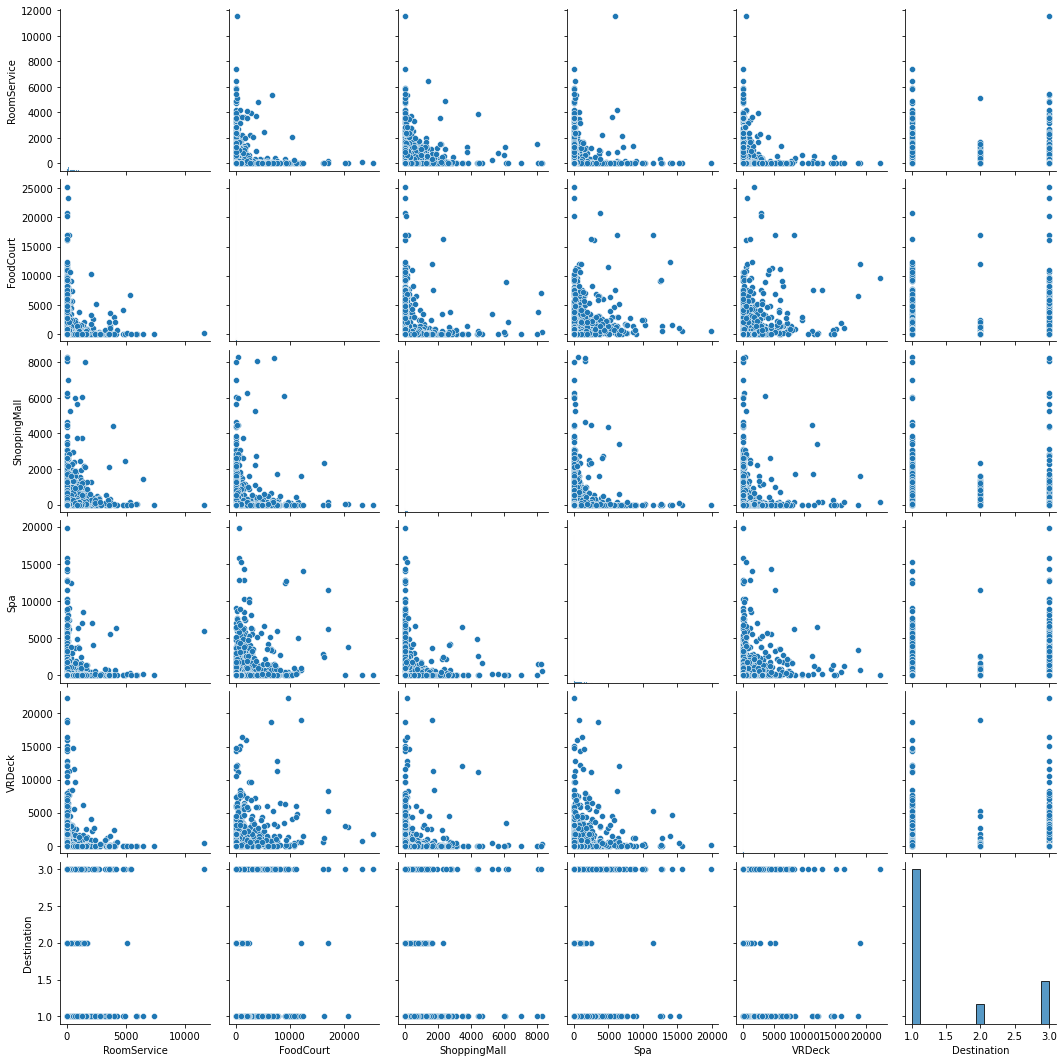

In [35]:
sns.pairplot(data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Destination']],palette='coolwarm')

In [36]:
data.loc[data.Spa > 17000, 'Destination'] = data['Destination'].fillna(3)
data.loc[data.FoodCourt > 21000, 'Destination'] = data['Destination'].fillna(3)

<AxesSubplot:xlabel='Deck', ylabel='count'>

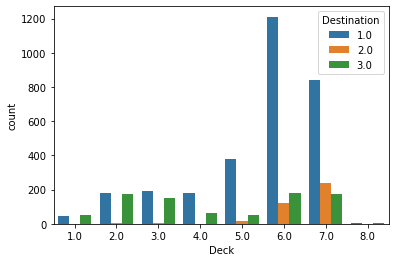

In [37]:
sns.countplot(x='Deck',hue='Destination',data=data)

In [38]:
data.loc[data.Deck == 6, 'Destination'] = data['Destination'].fillna(1)
data.loc[data.Deck == 7, 'Destination'] = data['Destination'].fillna(1)
data.loc[data.Deck == 4, 'Destination'] = data['Destination'].fillna(1)
data.loc[data.Deck == 5, 'Destination'] = data['Destination'].fillna(1)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

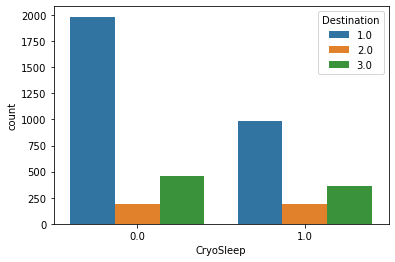

In [39]:
sns.countplot(x='CryoSleep',hue='Destination',data=data)

<AxesSubplot:xlabel='Destination', ylabel='count'>

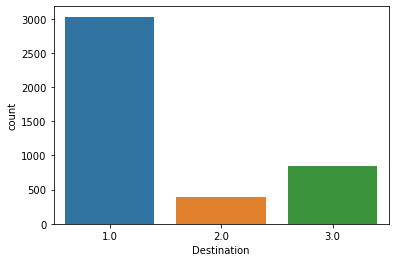

In [40]:
sns.countplot(x='Destination',data=data)

In [41]:
data['Destination'] = data['Destination'].fillna(1)

### Now let do for CryoSleep column

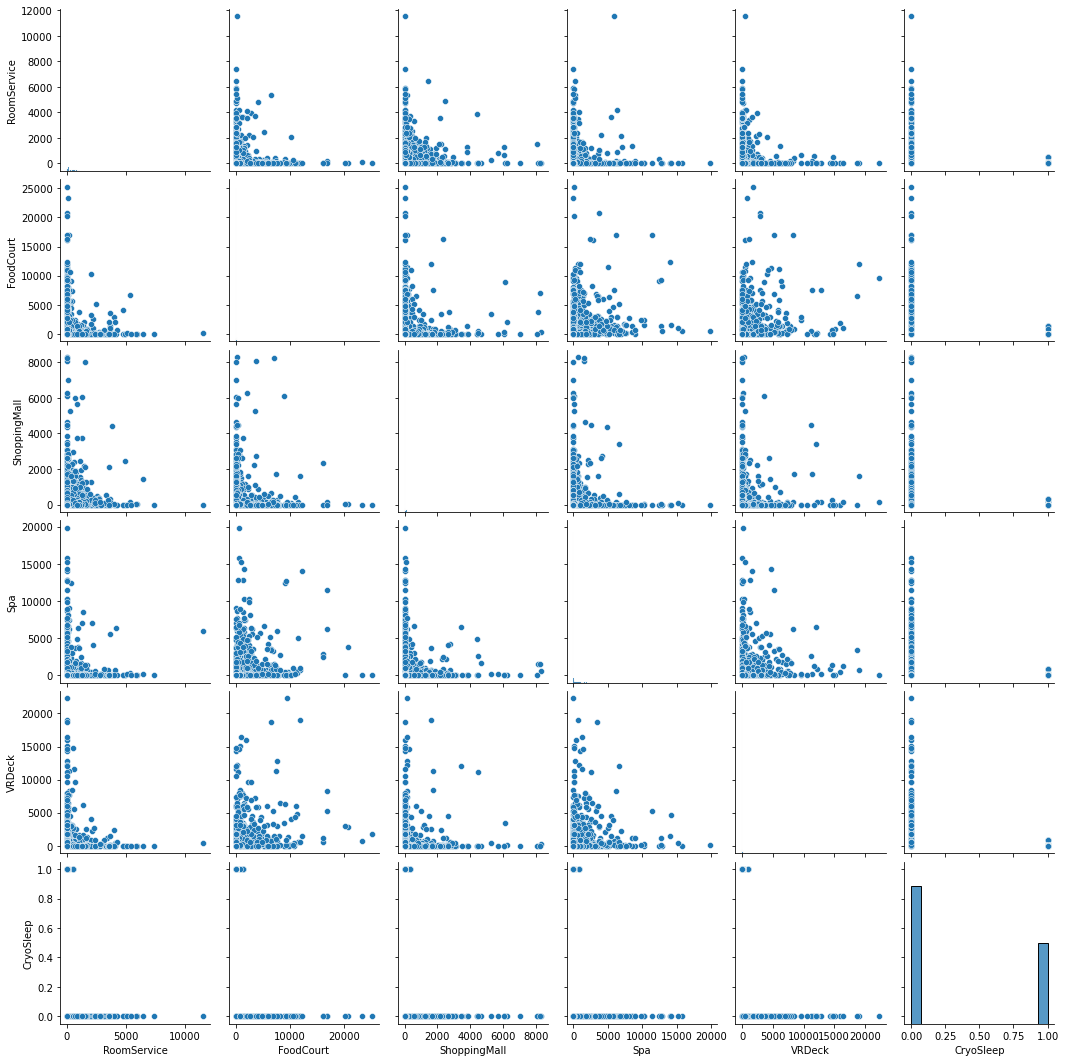

In [42]:
sns.pairplot(data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoSleep']],palette='coolwarm')

In [43]:
data.loc[data.RoomService > 550, 'CryoSleep'] = data['CryoSleep'].fillna(0)
data.loc[data.FoodCourt > 1500, 'CryoSleep'] = data['CryoSleep'].fillna(0)
data.loc[data.ShoppingMall > 380, 'CryoSleep'] = data['CryoSleep'].fillna(0)
data.loc[data.Spa > 1000, 'CryoSleep'] = data['CryoSleep'].fillna(0)
data.loc[data.VRDeck > 1000, 'CryoSleep'] = data['CryoSleep'].fillna(0)

<AxesSubplot:xlabel='Deck', ylabel='count'>

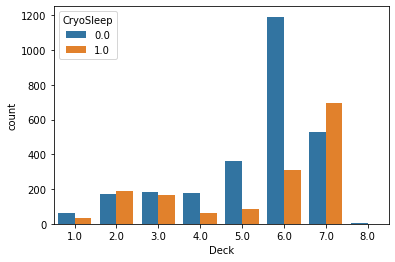

In [44]:
sns.countplot(x='Deck',hue='CryoSleep',data=data)

In [45]:
data.loc[data.Deck == 7, 'CryoSleep'] = data.fillna(1)

In [46]:
data['CryoSleep'] = data['CryoSleep'].fillna(0)

### Now we will do Age column

In [47]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())

## The last step is to export test file as csv, so we can use it for our predictions

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group         4277 non-null   object 
 1   HomePlanet    4277 non-null   float64
 2   CryoSleep     4277 non-null   float64
 3   Deck          4277 non-null   float64
 4   Destination   4277 non-null   float64
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   float64
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
dtypes: float64(11), object(1)
memory usage: 401.1+ KB


In [49]:
data.to_csv('processed_test.csv', index = False)